# Create Questions!
1. Ibovespa Index by year, months and days, grouped
1. Ibovespa index by days of year, weeks of year, days of week, compared by each year
1. Correlate Ibovespa Index with volume and quotes period

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  
%matplotlib inline
%config IPCompleter.greedy=True

In [38]:
data_ibov = pd.read_csv('./data/investing-indice-bovespa-2000-2019.csv')
data_ibov=data_ibov.melt(id_vars={"Data","Vol.","Var%"},var_name="quote_period",value_name="index_bov")
data_ibov.rename(columns={"Vol.":"volume","Data":"date","Var%":"perc_variation"},inplace=True)
data_ibov = data_ibov[["date","index_bov","quote_period","volume","perc_variation"]]
df_ibov = pd.DataFrame(data_ibov)
df_ibov["perc_variation"]=df_ibov["perc_variation"].str.replace("%","")
df_ibov["date"] = pd.to_datetime(df_ibov["date"])
df_ibov["index_bov"]=df_ibov["index_bov"].str.replace(",","")
df_ibov["index_bov"]=pd.to_numeric(df_ibov["index_bov"])

In [124]:
df_ibov.head()

,date,index_bov,quote_period,volume,perc_variation
0,2019-09-16,103.68041,Último,"6,04M","0,17"
1,2019-09-13,103.50118,Último,"4,04M","-0,83"
2,2019-12-09,104.37091,Último,"4,96M","0,89"
3,2019-11-09,103.44560,Último,"4,88M","0,40"
4,2019-10-09,103.03150,Último,"5,48M","-0,14"


In [40]:
year_month_2019_08 = (df_ibov.date.dt.year==2019)&(df_ibov.date.dt.month==8)
df_ibov_gp_year_month_2019_08 = df_ibov[year_month_2019_08]
df_ibov_gp_year_month_2019_08 = df_ibov_gp_year_month_2019_08.sort_values(by="date",ascending=True)

Text(0.5,1,'Ibovespa Index in August 2019')

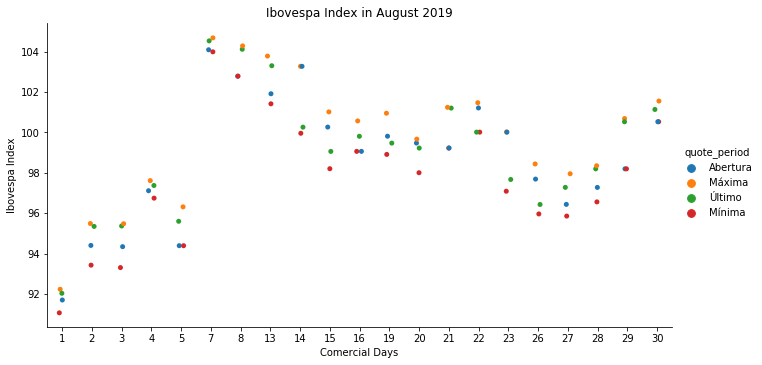

In [5]:
viz_1 = sns.catplot(x="date",
                    y="index_bov",
                    aspect=2.0,
                    height=5,
                    hue="quote_period",
                    data=df_ibov_gp_year_month_2019_08)
viz_1.set_axis_labels("Comercial Days","Ibovespa Index")
viz_1.set_xticklabels(df_ibov_gp_year_month_2019_08.date.dt.day.unique())
viz_1.ax.set_title("Ibovespa Index in August 2019")

Text(0.5,1,'Ibovespa Index in August 2019')

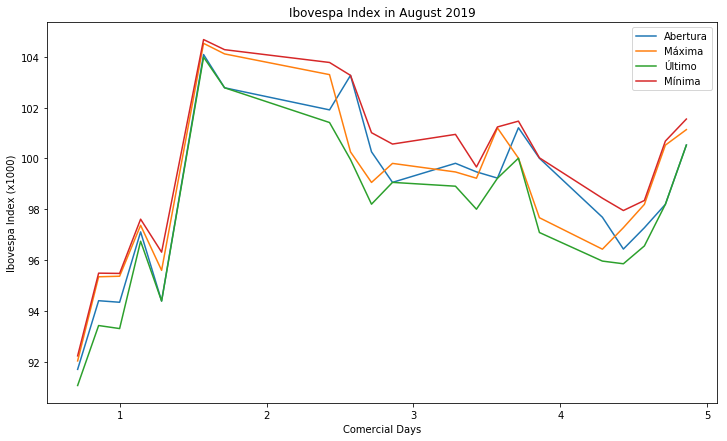

In [154]:
plt.figure(figsize=(12,7))
viz_1_1 = sns.lineplot(x="date",
                    y="index_bov",
                    hue="quote_period",
                       markers=True,
                       hue_order=("Abertura","Último","Mínima","Máxima"),
                    data=df_ibov_gp_year_month_2019_08)
viz_1_1.set_xticklabels(df_ibov_gp_year_month_2019_08.date.dt.day.unique())
viz_1_1.xaxis.set_label_text("Comercial Days")
viz_1_1.yaxis.set_label_text("Ibovespa Index (x1000)")
viz_1_1.legend(df_ibov_gp_year_month_2019_08.quote_period.unique())
viz_1_1.set_title("Ibovespa Index in August 2019")

In [122]:
fig = px.line(df_ibov_gp_year_month_2019_08, 
              x="date", 
              y="index_bov", 
              color='quote_period',
              hover_name='quote_period',
              hover_data=['date','index_bov'],
              labels={"date":"Comercial Days","index_bov":"Ibovespa Index (x1000)","quote_period":"Período"},
             title="<b>Ibovespa Index in August 2019</b>")
fig.update_layout(hovermode = 'x')
fig.show()

Text(0.5,1,'Ibovespa Index Variation in August 2019')

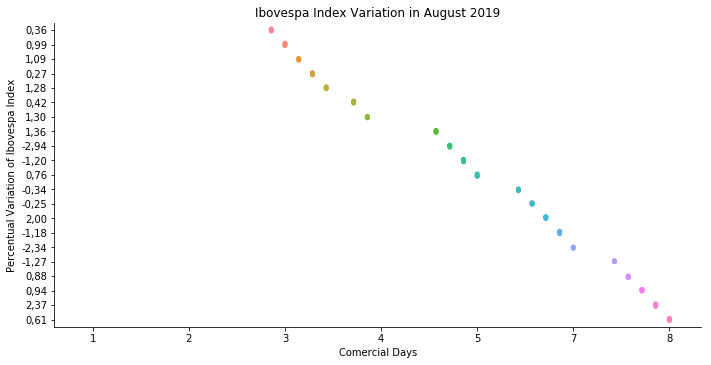

In [8]:
viz_2 = sns.catplot(
                    x="date",
                    y="perc_variation",
                    aspect=2.0,
                    height=5,
                    data=df_ibov_gp_year_month_2019_08)
viz_2.set_axis_labels("Comercial Days","Percentual Variation of Ibovespa Index")
viz_2.set_xticklabels(df_ibov_gp_year_month_2019_08.date.dt.day.unique())
viz_2.ax.set_title("Ibovespa Index Variation in August 2019")

In [123]:
fig = px.bar(df_ibov_gp_year_month_2019_08, 
              x="date", 
              y="perc_variation", 
              color='quote_period',
              hover_name='quote_period',
              hover_data=['date','index_bov'],
              labels={"date":"Comercial Days",
                      "index_bov":"Ibovespa Index (x1000)",
                      "quote_period":"Período",
                     "perc_variation":"Percent Variation"},
             title="<b>Percentual Variation of Ibovespa Index in August 2019</b>")
fig.update_layout(hovermode = 'x')
fig.show()